In [1]:
# This is a summary notebooks showcasing the main results of the project that can be explored and commented along with the provided codes
from IPython.display import Image
import os
import ipyplot

current_dir = os.getcwd()
figures = os.path.join(current_dir, 'figures')

In [2]:
# %% 
# In this project we consider some common Reinforcement learning algorithms used in Yawning Titan, abstract graph network simulator, evaluating the performances
# such agents while modifying the network status. Furthermore we focus on the zero-shot deployment of agents from training in synthetic networks to 
# realistic environments.
# 
# The scope of this document is to showcase the main functions and documents already present in the repository that can 

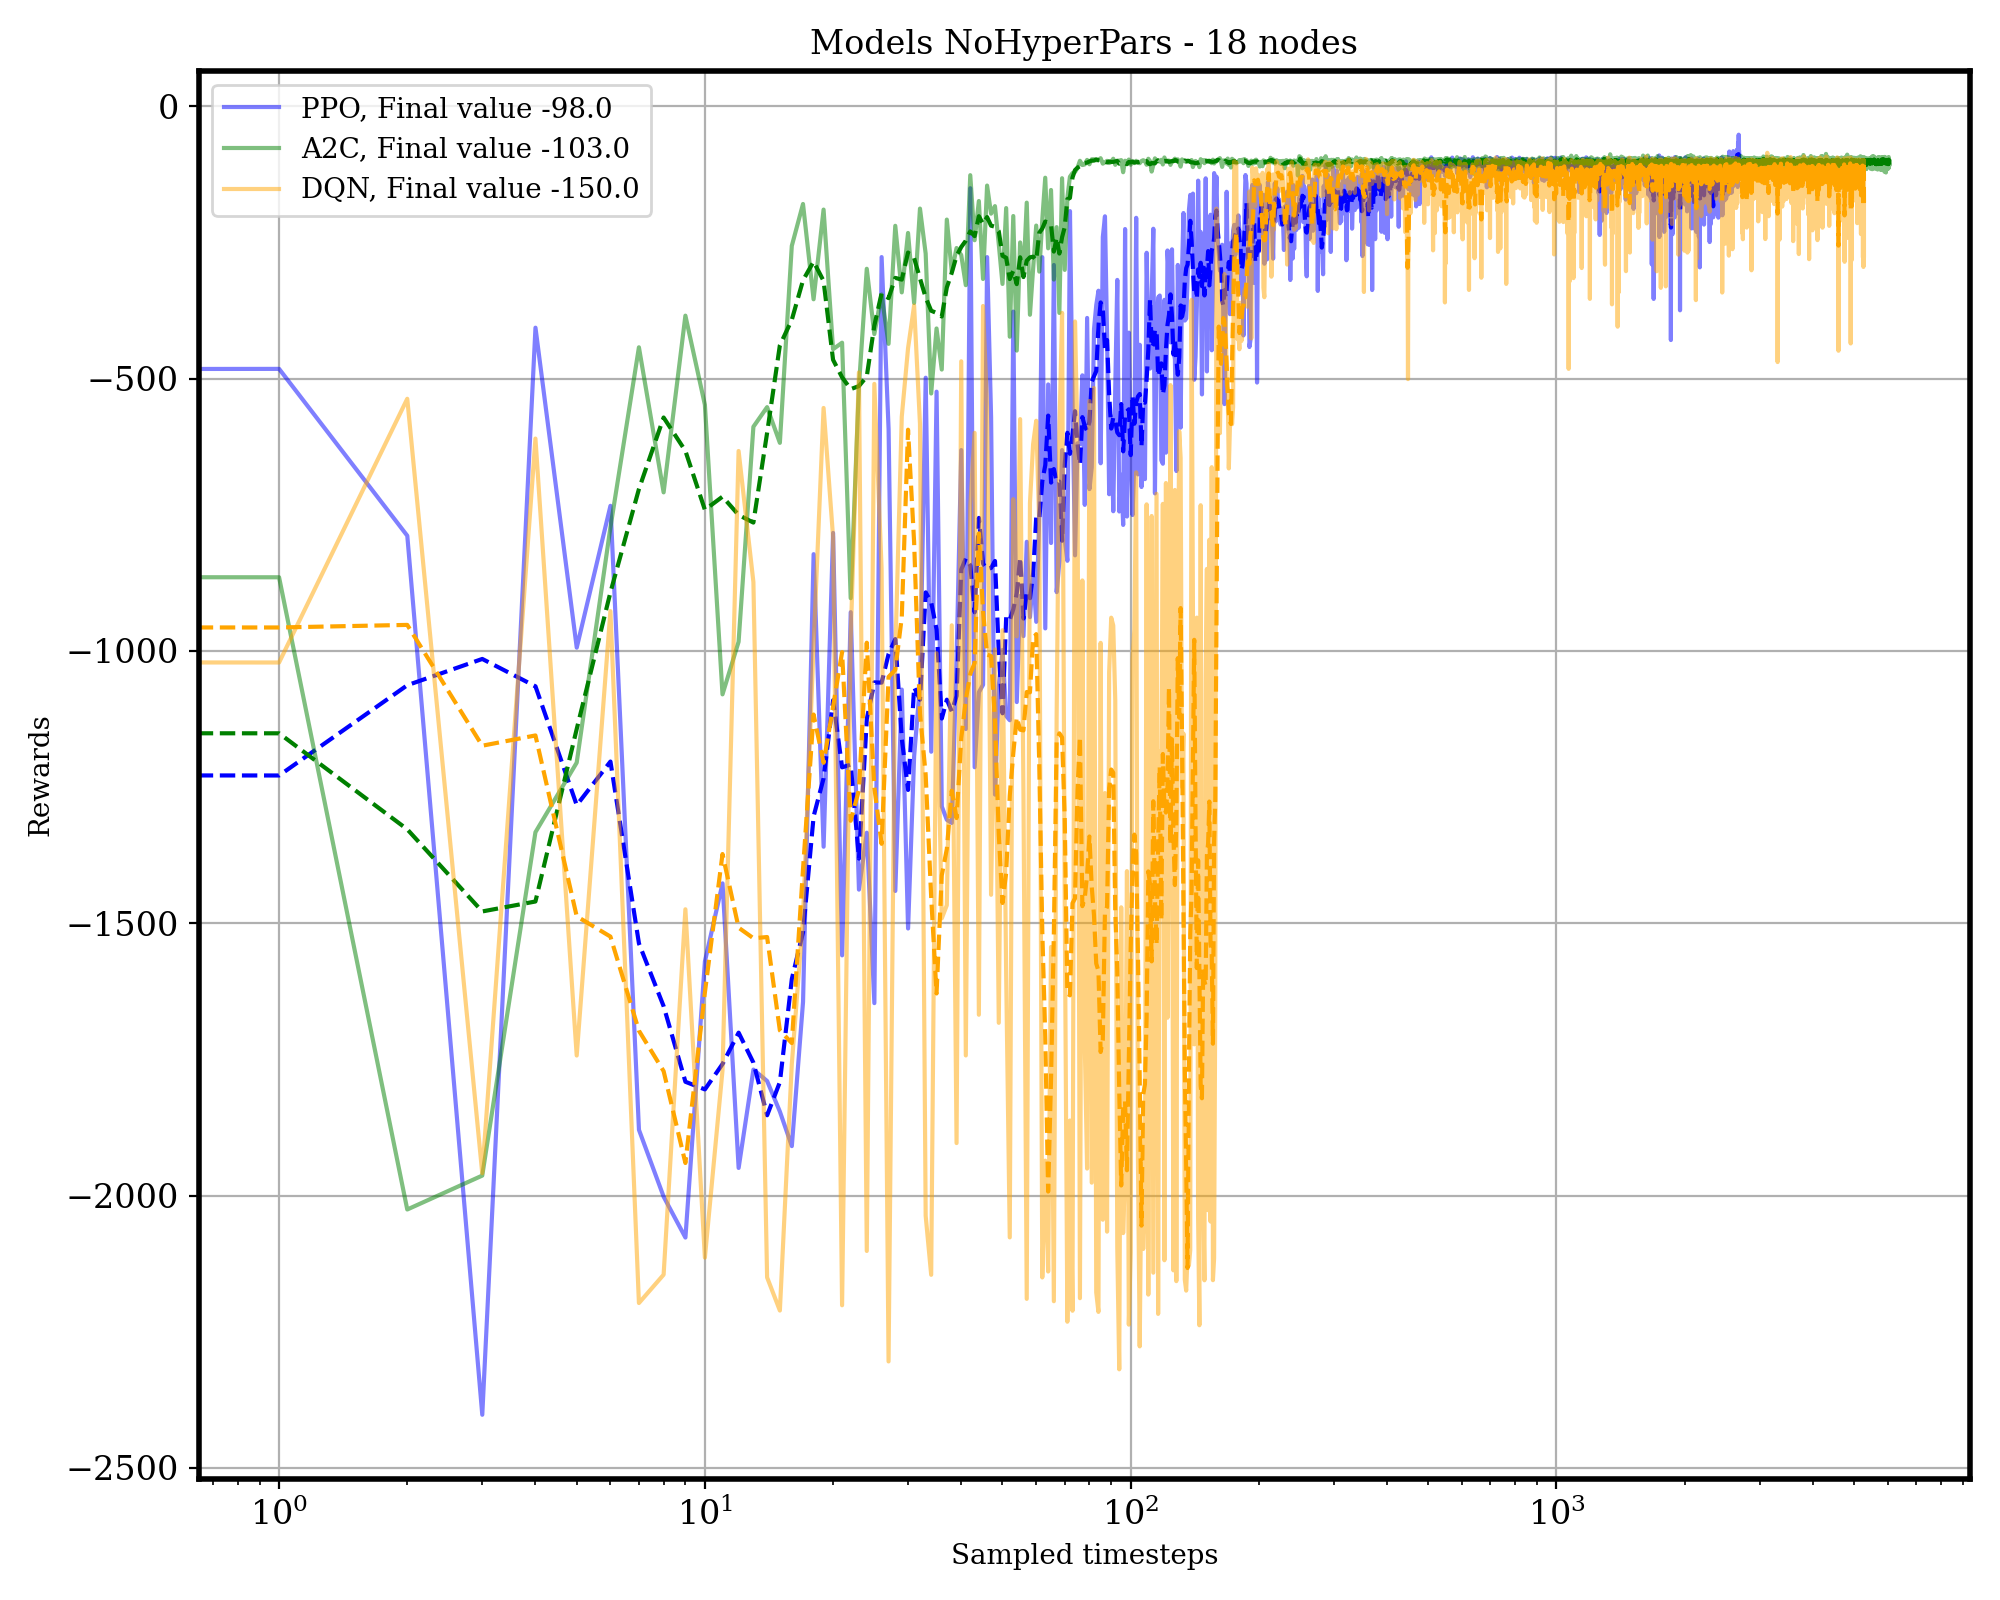

In [3]:
# %% Show the training performances of the various algorithms
# We have trained (and you can train them too using the code train_agents.py) and we want to see the training performances, so when they have converged to an
# optimal solution and how are the rewards obtained while converging.
# Using the code provided show training performances it is possible to see the training curve of the various agents, while changing
# the network size and the hyper parameters.
Image(os.path.join(figures, 'training_performances_18_nodes_NoHyperPars.png'), width=800)

In [4]:
## Plot description
# In the first example we can see the case of the 18 nodes network and we compare three different algorithms, PPO, A2C and DQN with 
# no changes in the standard hyperparameters, the values are kept the same as the lybrary default (Stable-Baselines3).
# We show in three different colors the three algorithms: 
# - blue for PPO
# - green for A2C
# - yellow for DQN
# The sampled timesteps is a measure of how long did the simulation take to converge, every timestep is composed of 50 environment evaluations. 
# The y-axis shows the rewards per episode.
# The dashed line is the running mean of the rewards shown. In the legend we present the final reward scored by each algorithm to give an idea how what are the
# final scores, the condition to stop the training was that no improvement was recorded after 3 consecutive evaluations.
# It's possible to note that all three algorithms improve the rewards across the timesteps showing that the agent is learning a policy
# to stop the red agent spread or counteracting such actions. In this case we show the 18 nodes case but below we show the 50 and 100 nodes as well.

In [5]:
# create a list of images
image_list = [os.path.join(figures, 'training_performances_50_nodes_NoHyperPars.png'), 
             os.path.join(figures, 'training_performances_100_nodes_NoHyperPars.png')]
# show the images
ipyplot.plot_images(image_list, max_images=2, img_width=550)

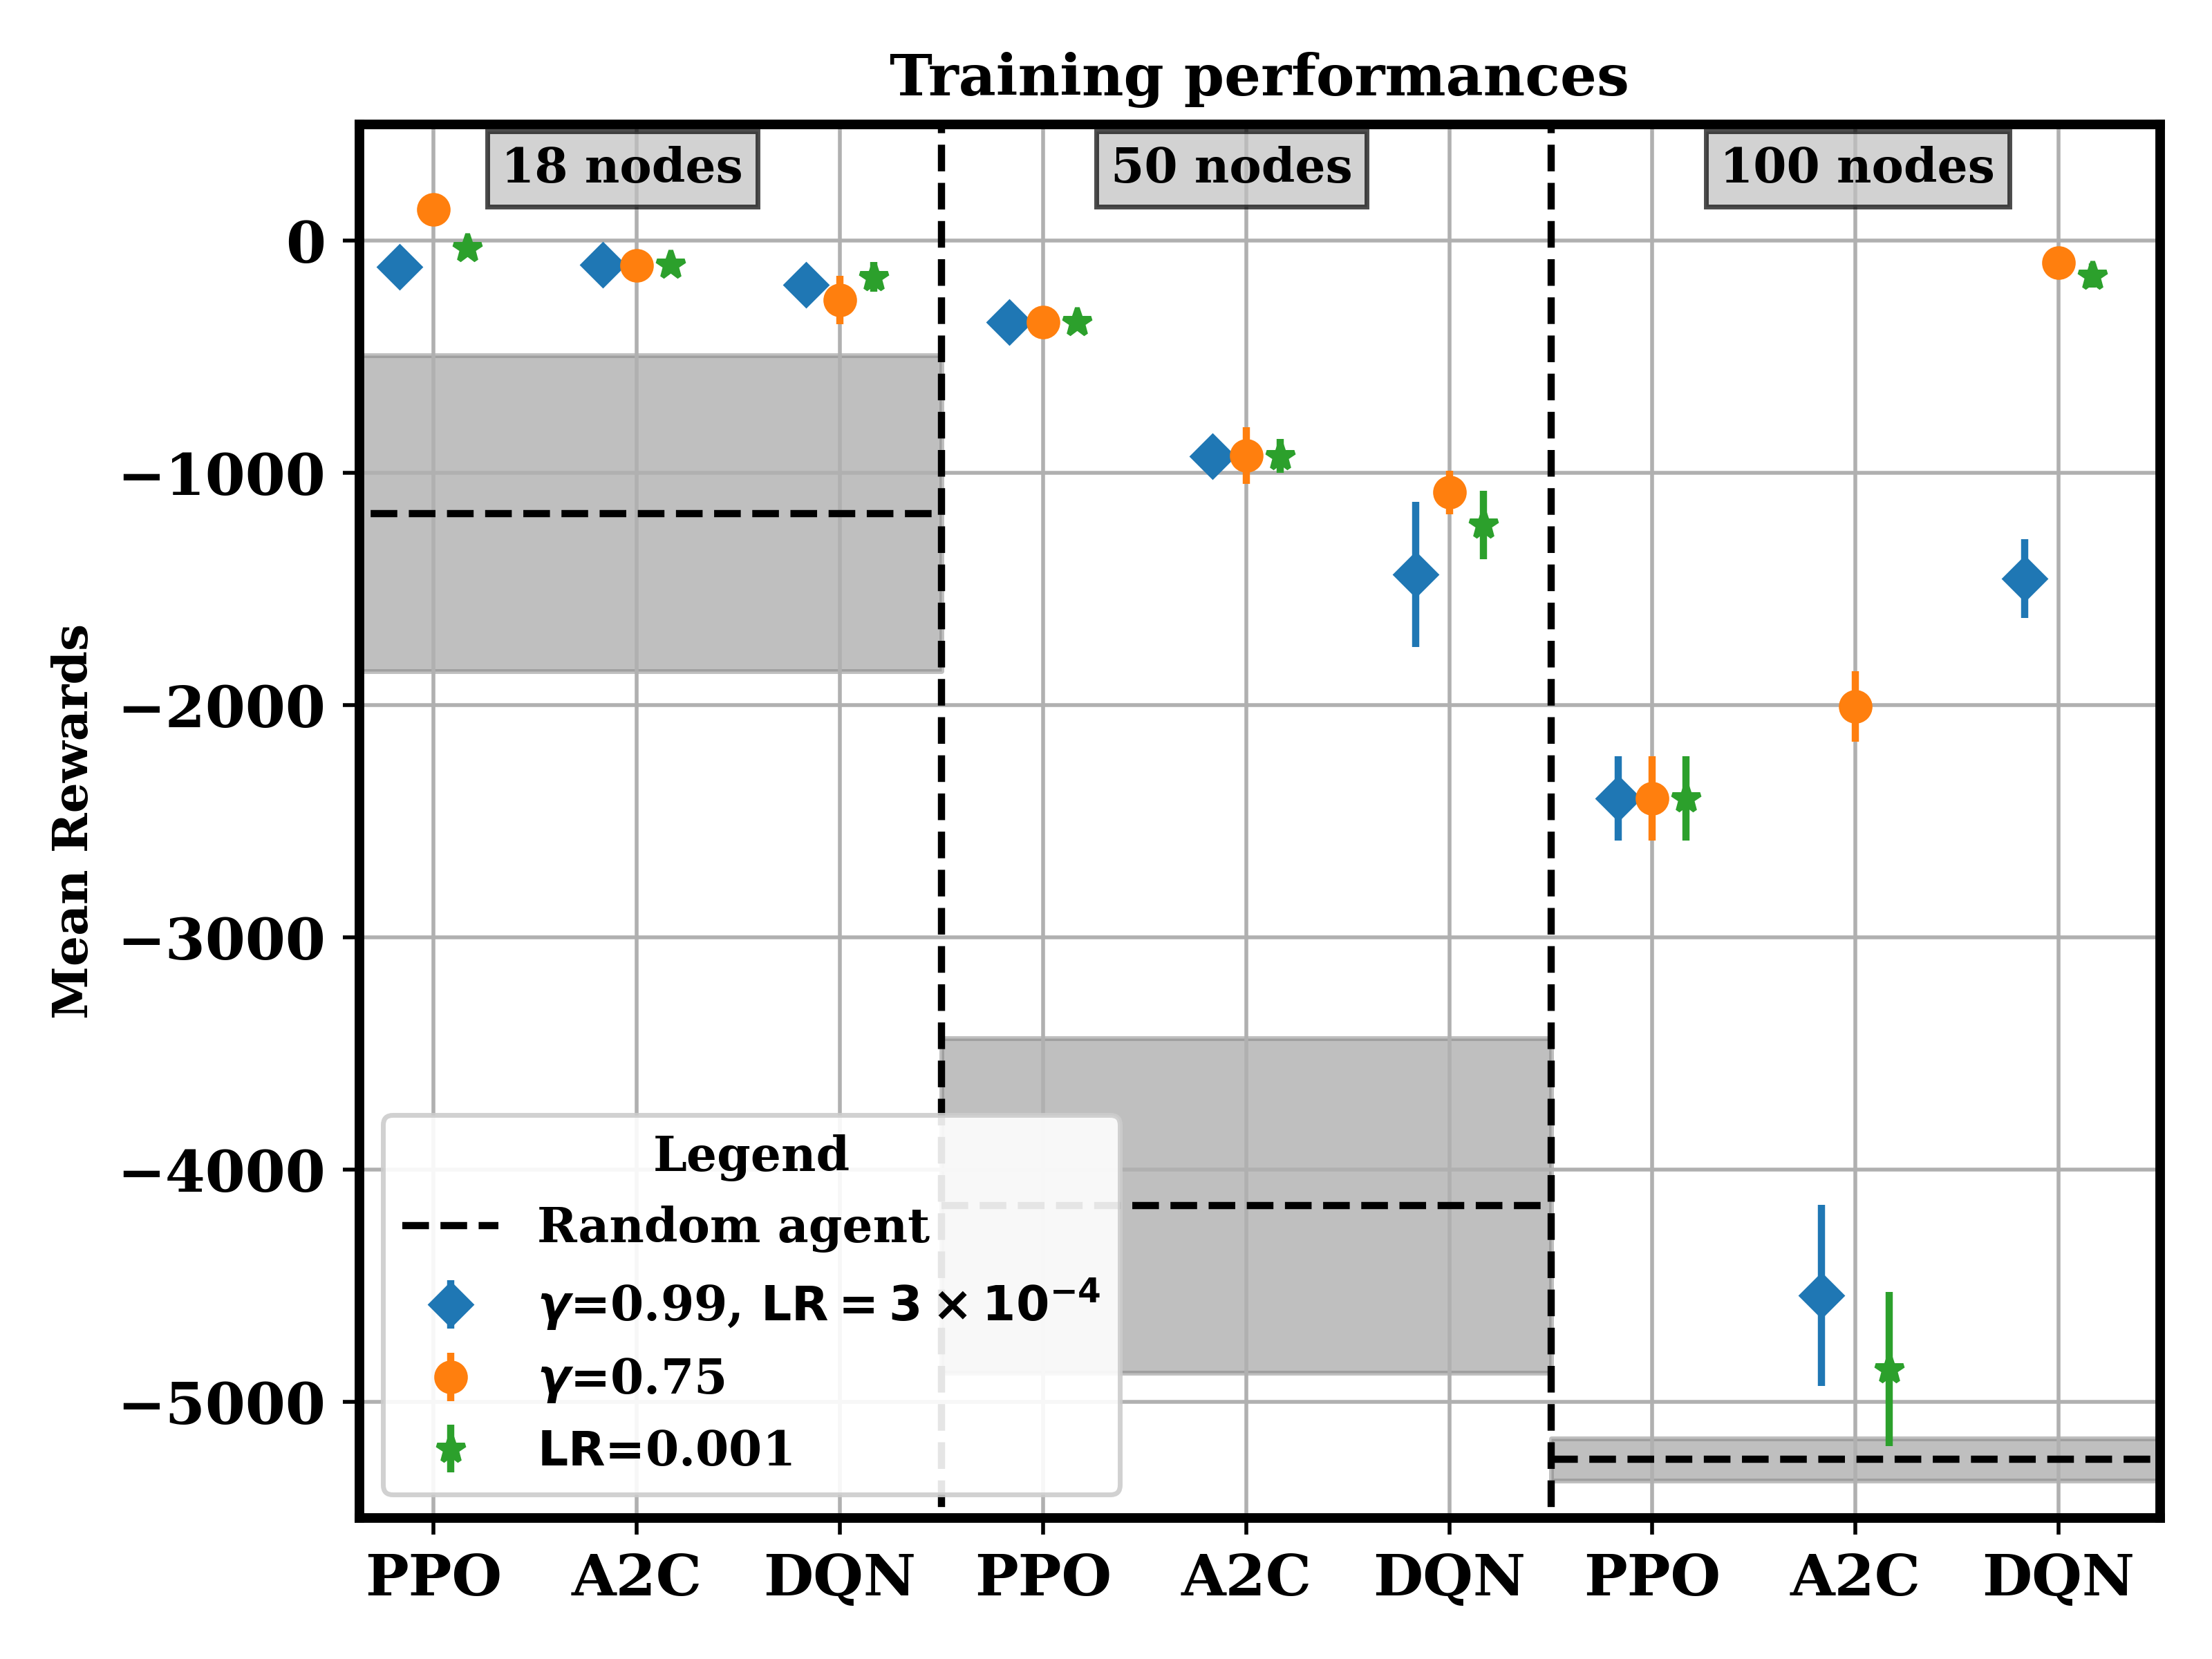

In [6]:
# %% Model evaluation
# 
# We have performed the training of the various agents on several networks of different sizes: 18, 50 and 100. In addition we 
# tested how the performances change if we tweak some hyper-parameters of the model, in detail the discount factor (DF/$alpha£) and the
# learning rate (lr). 
# The idea is to have a panoramic view of which of these models will over-perform and find the most suitable to be deployed on
# realistic networks. 
# To evaluate the performance we can use the code evaluate_agent_performances which can load a specific network size, load the 
# trained model (that can be found in logs_dir) and deploy such agent into a seeded simulation. We have as well the random agent 
# performances that can be considered as lower bound to the rewards that can be achieved during the simulations.
Image(os.path.join(figures, 'exploration_RL_models_nodes_updates_paper_fix.png'), width=800)

In [7]:
## Plot description
# We divide the plot in network sizes: left 18, center 50 and right 100 nodes. For each panel we plot the algoriths with the different hyper-
# parameters changed (as shown in the legend) with different symbols:
# - blue square - standard hyper-parameters;
# - orange dot - gamma-discount factor to 0.75;
# - green star - learning rate to 0.01;
# black lines and grey bands : random agents performances and 1 standard deviation of the performances.
# Each dot in the plot is measured over 5 seeded simulations and represents the mean of the measurements and the errorbars (not always
# visible) are 1 standard deviations. 
# As we can see, in all cases the Rl algorithms have higher performances in comparison to the random agent, 
# scores closer to 0 (or above) are signal of better performances during the simulations. However it is 
# interesting to see that as the network increases the scores are lower and lower, due to the 
# lenght of the simulations and as well for the increased complexity. 
# In the largest network available we see that DQN algorithm (with reduced buffersize) outperforms
# the other algorithms.
# You can create a similar plot using the code show_agents_deployment_barying_hyperpars!

In [8]:
## Exploring the agents' resilience
# 
# We have seen in the previous plots how the various agents perform in 
# networks of different sizes, showing the resilience of the agents in changing the environment
# where they interact. In more detail, we are interested in measuring how the algorithms
# react when we add isolated, compromised nodes, we change the topology of the network
# adding or removing edges and finally against a less or higher effective red agent 
# modelled increasing the skills (more effective attack rate).
# The way to test is the same as we have done before, we trial the 
# agents on seeded networks and we collect the mean and standard deviation of the
# final rewards and we compare against the random agent performances, as a measure comparison.
# To collect the relevant data we run again the code evaluate_performances.py that
# allows to test the various extension to the standard setup for the various sizes and 
# we can process the results using some auxiliary codes provided in and 
# plot the final results.

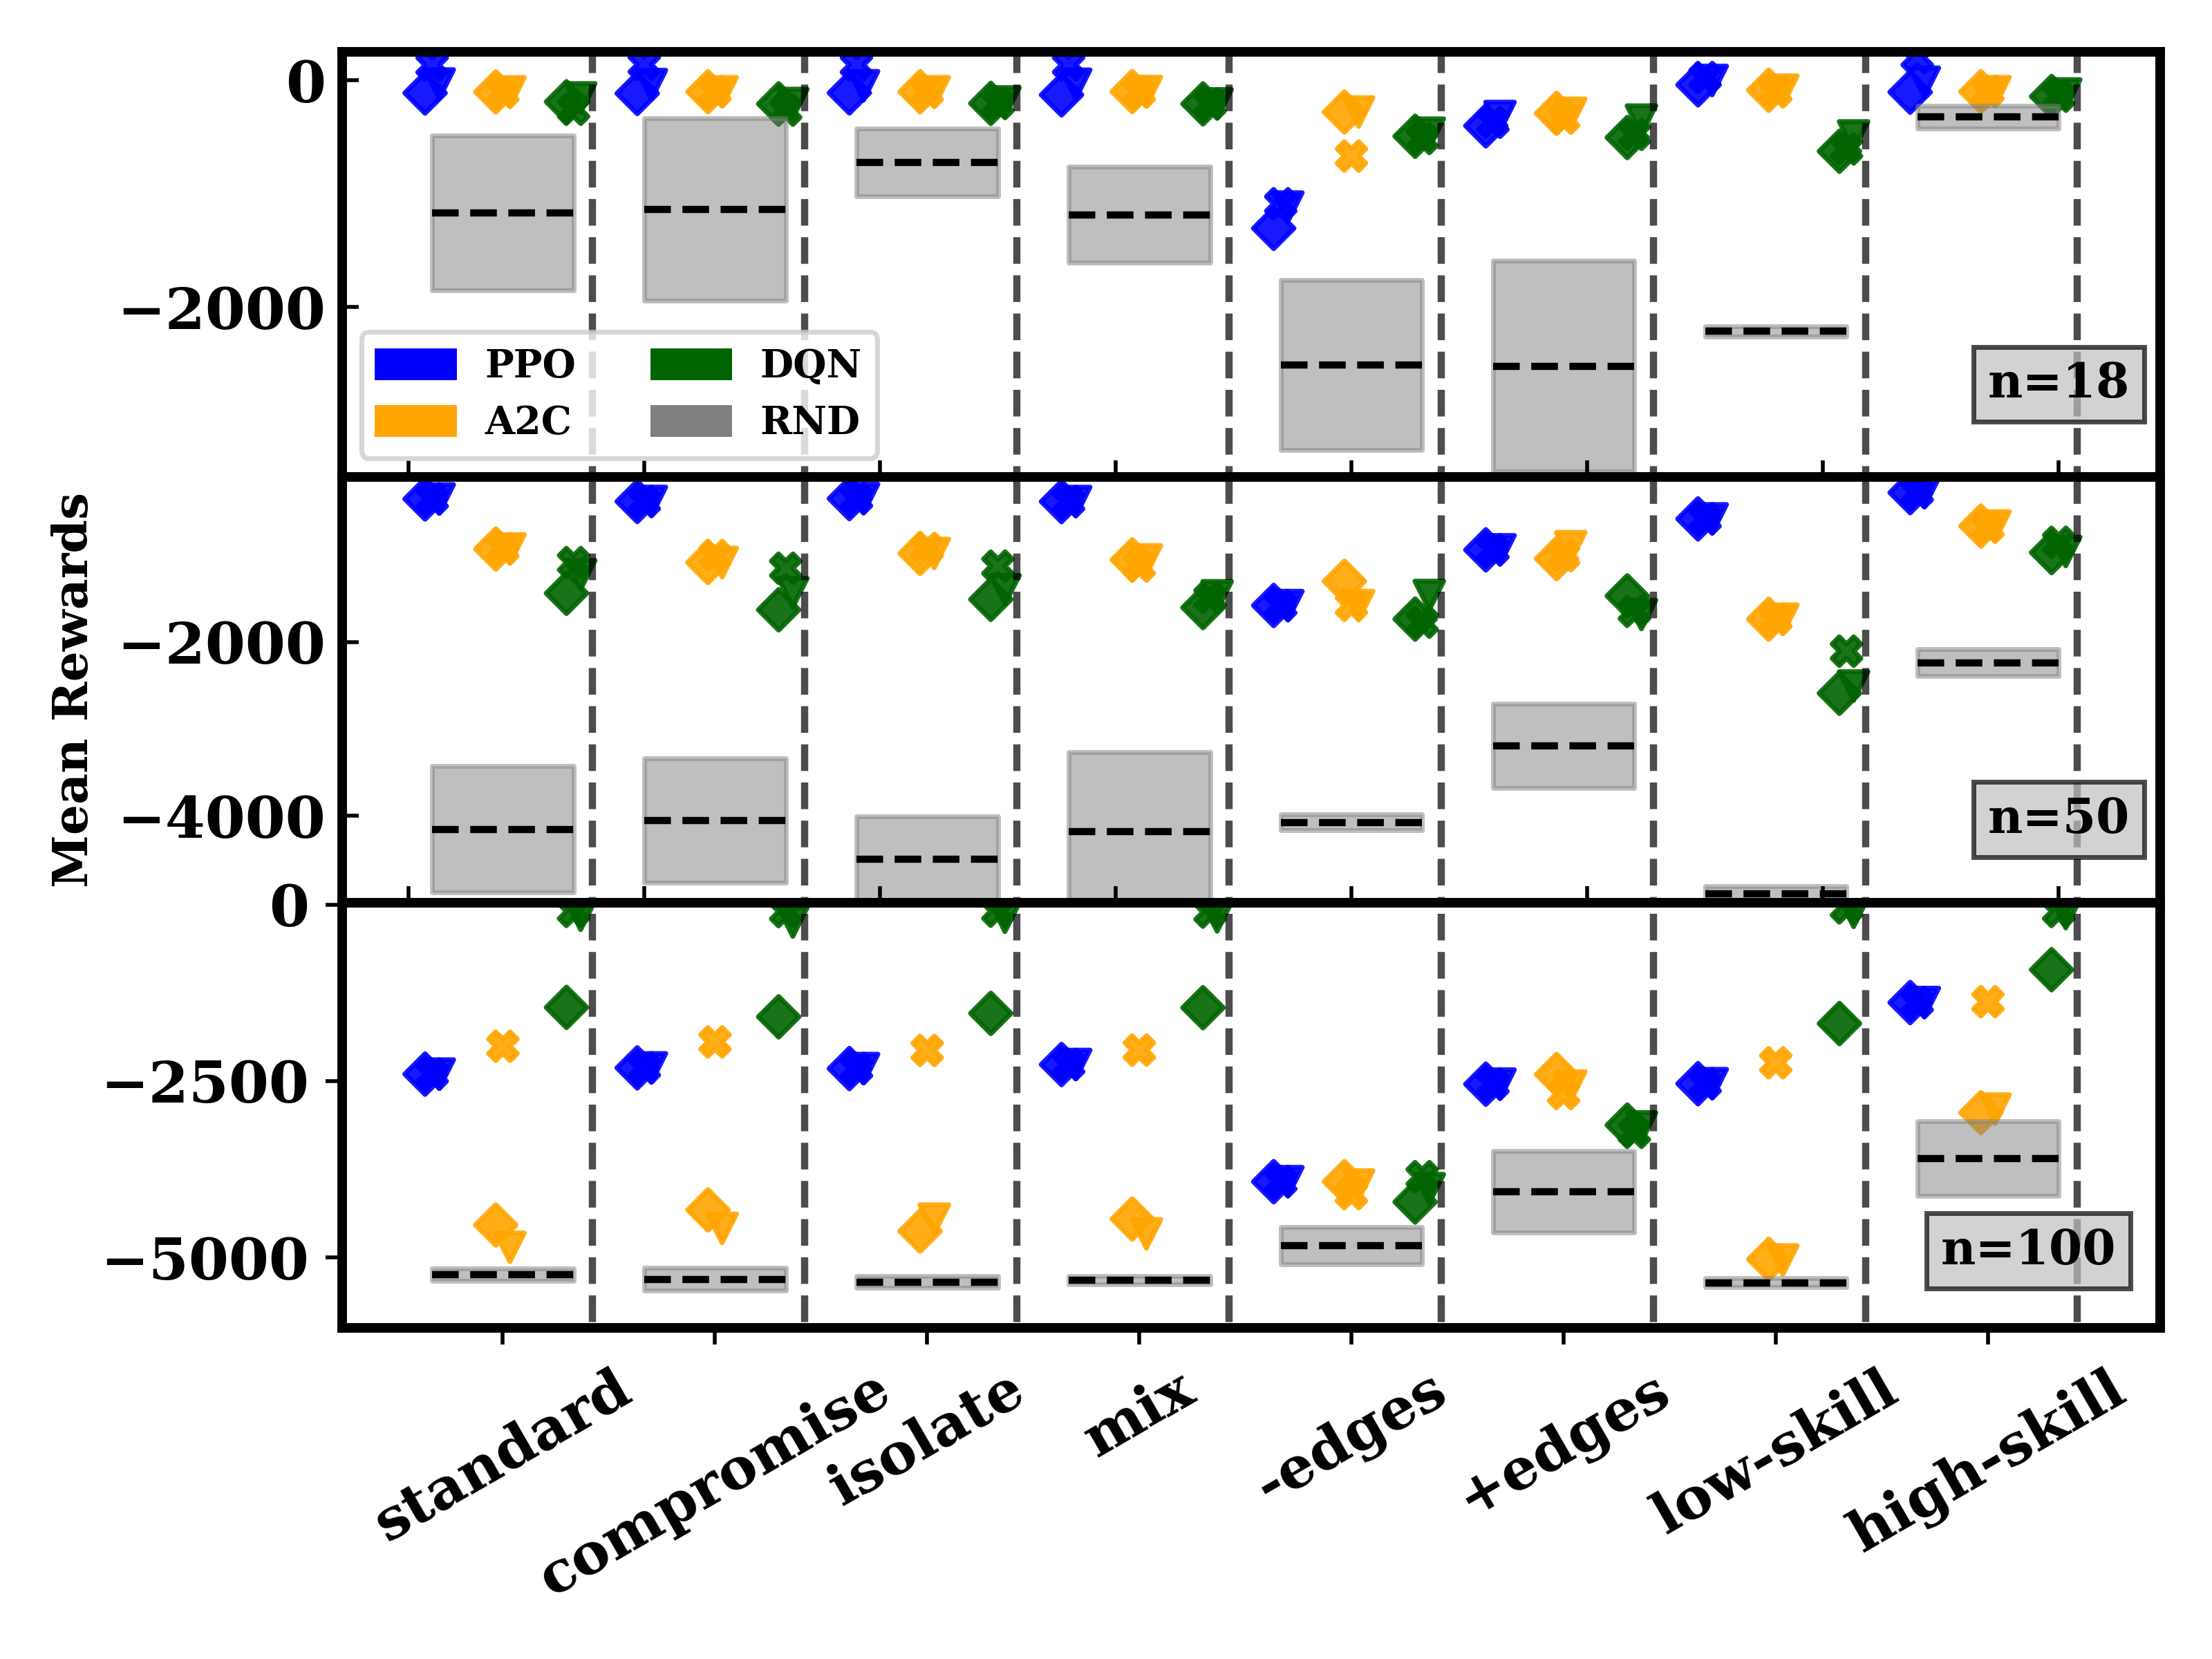

In [9]:
Image(os.path.join(figures, 'agents_deployment_extension.png'), width=800)

In [10]:
## Plot explanation
# This plot summarised a lot of information and can be challenging to disentangle so better have
# a short walk in explaining what it is presented.
# This plot is built on three panels showing the different network sizes: 18 top, 50 center and 100 bottom.
# On the y-axis there are the mean scores for each panel, that can be different and they are in log scale as well.
# On the x-axis there are the various algorithms extension, from standard, compromise (with three nodes infected), 
# isolate with three nodes isolated, a mix of both, performances on networks with fewer edges, 
# performances on network with more edges, and against low and high skill red agent.
# The color of the ;points show the different algorithms, blue for PPO, orange for A2C and green for DQN,
# while the shape of the data points reflects which extension we consider (left no hyperparameters tuned - square, 
# center with discount factor triangle, and right cross learning rate). 
# To compare against we have the random agent performances, the spread is particularly interesting.

In [11]:
## Deploy the best algorithms
# In the previous analysis our goal was to identify, by size and hyper-parameter, which algorithm was
# best-performing and use to it to train on a synthetic network and deploy it on a 
# realistic and "unknown" network (assuming the same number of nodes).
# The scope is to understand and qunatify how RL agents can be re-deployed in a zero-shot
# deployment on realistic networks, in light of training them on a set of fixed sizes and 
# then deploy onto real nerworks, which are kept unknwon for security reasons.
# We employ the A2C algorithm on a 22 nodes network, PPO on a 55 network and 
# DQN on a 60 nodes network. We trial all on the same seeded simulations on the same
# training network and trial on the realistic network.

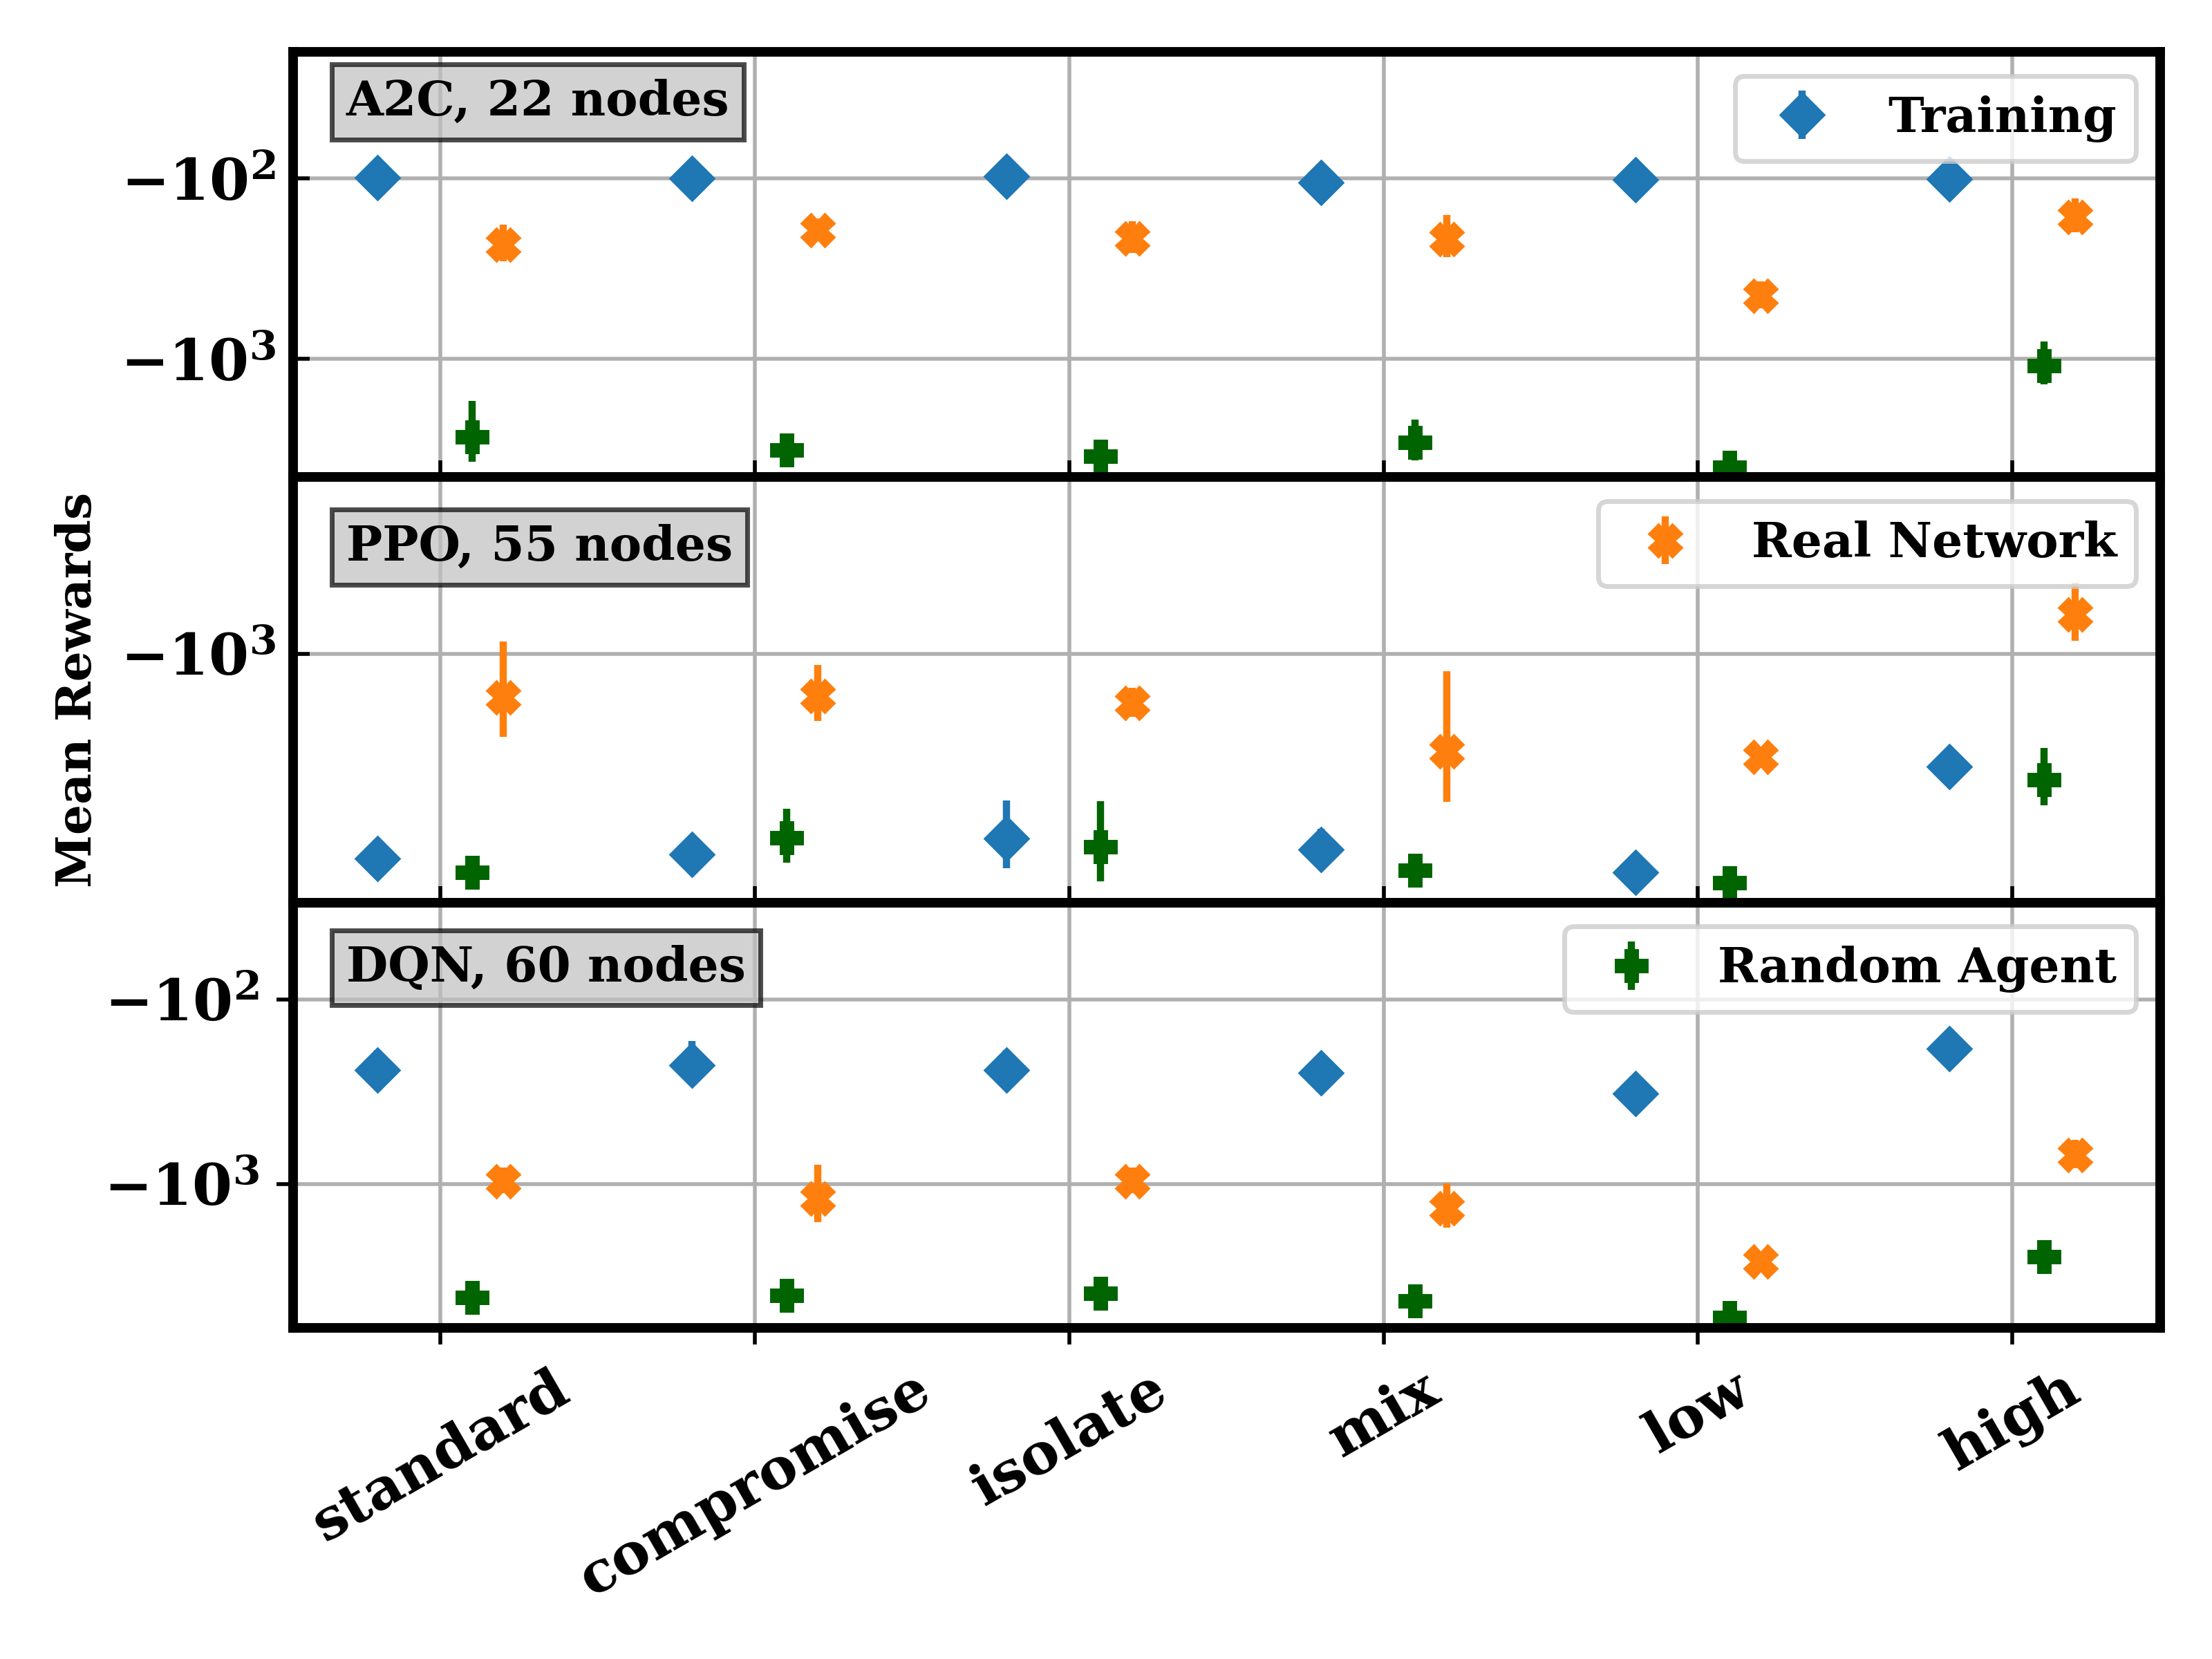

In [12]:
Image(os.path.join(figures, 'real_deployment.png'), width=800)

In [ ]:
## Plot description
# The figure shows the mean scores obtained by each agent and the random agent as a baseline score.
# In blue dots we show the results on the training network, the orange dots the ones on the 
# realistic networks and in green the random scores. The top panel shows the results on the A2C
# on 22 nodes networks, the middle on PPO on 55 nodes and final the DQN on a network of 60 nodes.
# The x-label shows which change we have applied to the network (standard, compromise, isolation and 
# low or high red skills). 
# We note that the results on realistic networks are more scattered, see the errorbars, in comparison
# to the results on the training network. We measure a worsening of performances in both A2C and DQN cases
# where the differences between the scores is mostly constant in all cases. While in the PPO case
# we note better performances on the real network, while the training is almost indistiguishable from 
# the random scores. We have not investigated further this topic.

In [13]:
## Explore the network statistics
# We have considered a number of different networks that we can explore to understand 
# some general statistics present, like the node clustering or the number of triangles. We employ the 
# capabilities in networkx package to obtain this information for all the graphs present. 
# It is possible to explore the various networks using the code check_network_statistics.py
# Please allow some time to process all the information present
import check_network_statistics

18 nodes network
12.58253968253968 total number of clusters
---------------------------
0.6990299823633156 average clustering
---------------------------
{0: 35, 1: 44, 2: 62, 3: 48, 4: 16, 5: 64, 6: 61, 7: 54, 8: 41, 9: 34, 10: 35, 11: 32, 12: 62, 13: 46, 14: 41, 15: 37, 16: 33, 17: 68} number of triangles
---------------------------
813 total number of triangles
---------------------------
18 nodes network
4.472222222222221 total number of clusters
---------------------------
0.24845679012345678 average clustering
---------------------------
{0: 0, 1: 0, 2: 4, 3: 3, 4: 1, 5: 6, 6: 3, 7: 5, 8: 2, 9: 4, 10: 11, 11: 4, 12: 0, 13: 3, 14: 2, 15: 5, 16: 0, 17: 7} number of triangles
---------------------------
60 total number of triangles
---------------------------
network nodes network
29.87899228121378 total number of clusters
---------------------------
0.29878992281213773 average clustering
---------------------------
{0: 209, 1: 140, 2: 151, 3: 149, 4: 108, 5: 114, 6: 80, 7: 134, 8: 